In [ ]:
import csv
import random
from datetime import datetime, timedelta

def generate_random_data(start_time, end_time, interval_minutes=2, anomaly_probability=0.1):
    data = []
    current_time = start_time

    while current_time <= end_time:
        timestamp = current_time.strftime('%H:%M:%S')
        temperature = round(random.uniform(20, 30), 2)  # Random temperature between 20 and 30 degrees Celsius
        sound_level = random.randint(50, 100)  # Random sound level between 50 and 100
        vibration_level = random.uniform(0, 10)  # Random vibration level between 0 and 10

        # Introduce fewer anomalies randomly
        overall_anomaly = 1 if random.random() < anomaly_probability else 0

        data.append([timestamp, temperature, sound_level, vibration_level, overall_anomaly])

        current_time += timedelta(minutes=interval_minutes)

    return data

def save_to_csv(data, filename='random_dataset.csv'):
    with open(filename, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(['Timestamp', 'Temperature', 'Sound Level', 'Vibration Level', 'Anomaly'])
        csv_writer.writerows(data)

if __name__ == "__main__":
    start_time = datetime.strptime('00:00:00', '%H:%M:%S')
    end_time = datetime.strptime('23:59:59', '%H:%M:%S')

    # Adjust anomaly_probability to control the frequency of anomalies (e.g., 0.1 for 10% anomalies)
    random_data = generate_random_data(start_time, end_time, interval_minutes=2, anomaly_probability=0.1)
    save_to_csv(random_data)
    print(f"Random dataset saved to random_dataset.csv.")


Random dataset saved to random_dataset.csv.


Random Forest Results:
Accuracy: 0.9652777777777778
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       139
           1       0.00      0.00      0.00         5

    accuracy                           0.97       144
   macro avg       0.48      0.50      0.49       144
weighted avg       0.93      0.97      0.95       144


Decision Tree Results:
Accuracy: 0.9305555555555556
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       139
           1       0.00      0.00      0.00         5

    accuracy                           0.93       144
   macro avg       0.48      0.48      0.48       144
weighted avg       0.93      0.93      0.93       144


Logistic Regression Results:
Accuracy: 0.9652777777777778
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       139
 

/glob/development-tools/versions/oneapi/2023.2.0.1/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/glob/development-tools/versions/oneapi/2023.2.0.1/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/glob/development-tools/versions/oneapi/2023.2.0.1/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in

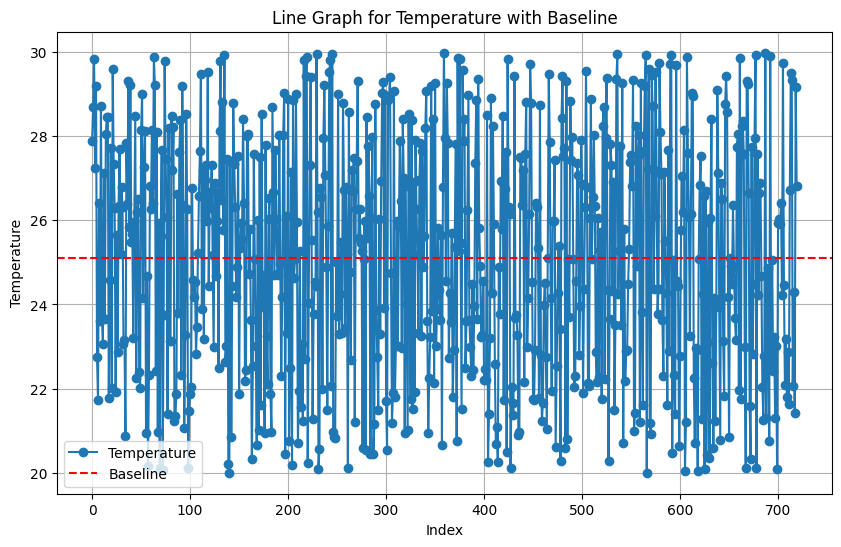

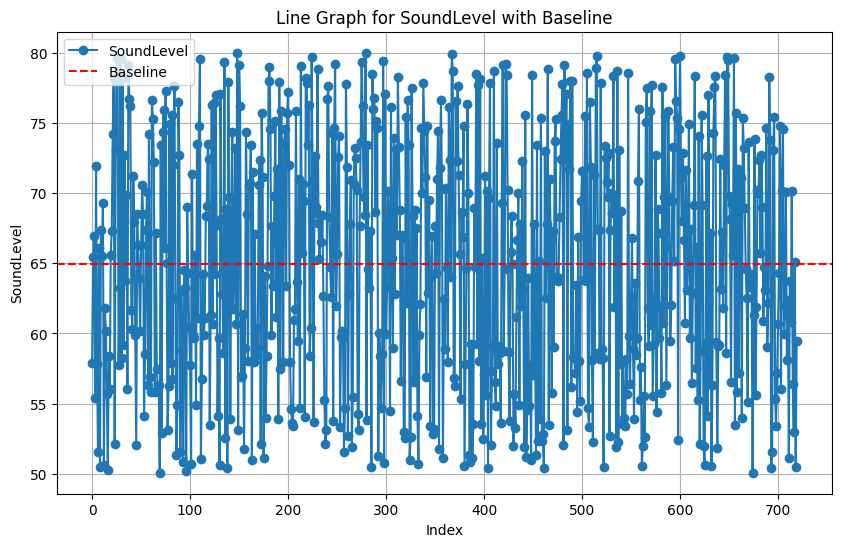

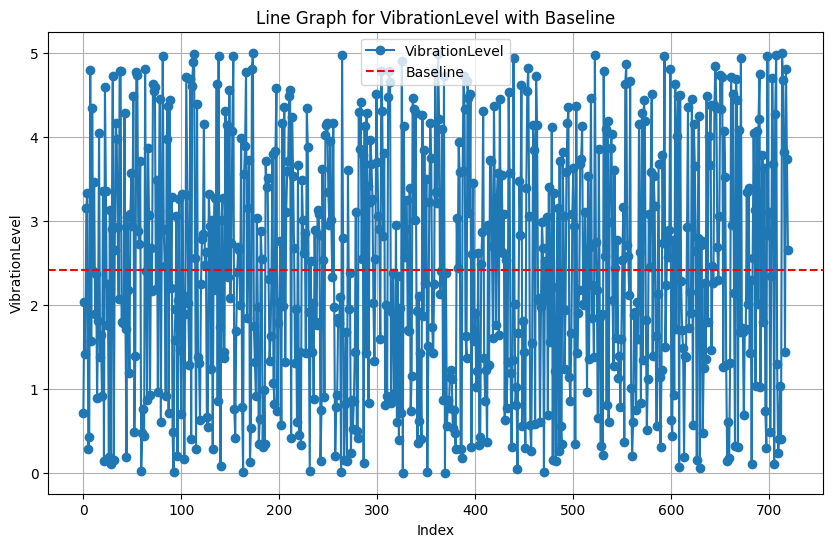

In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Load your dataset (replace 'random_dataset.csv' with your actual dataset file)
# df = pd.read_csv('random_dataset.csv')
df = pd.read_csv('generated_data_with_anomalies.csv')


# Preprocess the data
label_encoder = LabelEncoder()
df['Anomaly'] = label_encoder.fit_transform(df['Anomaly'])

# Define features and target
features = ['Temperature', 'SoundLevel', 'VibrationLevel']
target = 'Anomaly'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
rf_predictions = rf_classifier.predict(X_test_scaled)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))

# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)
dt_predictions = dt_classifier.predict(X_test_scaled)

print("\nDecision Tree Results:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))

# Logistic Regression
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train_scaled, y_train)
lr_predictions = lr_classifier.predict(X_test_scaled)

print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("Classification Report:\n", classification_report(y_test, lr_predictions))

# k-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)
knn_predictions = knn_classifier.predict(X_test_scaled)

print("\nk-Nearest Neighbors (KNN) Results:")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Classification Report:\n", classification_report(y_test, knn_predictions))

# Support Vector Machine (SVM)
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_scaled, y_train)
svm_predictions = svm_classifier.predict(X_test_scaled)

print("\nSupport Vector Machine (SVM) Results:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions))

import matplotlib.pyplot as plt



# Plotting line graphs for each feature with baseline
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[feature], marker='o', linestyle='-', label=f'{feature}')
    plt.axhline(y=df[feature].mean(), color='r', linestyle='--', label='Baseline')
    plt.title(f'Line Graph for {feature} with Baseline')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.legend()
    plt.grid(True)
    plt.show()




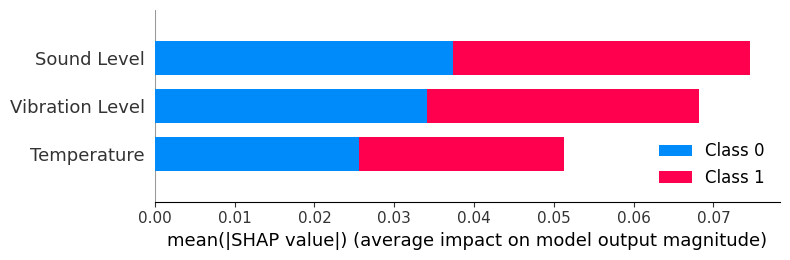

SVC(random_state=42)

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
import shap

# Load your dataset (replace 'random_dataset.csv' with your actual dataset file)
df = pd.read_csv('random_dataset.csv')

# Preprocess the data
label_encoder = LabelEncoder()
df['Anomaly'] = label_encoder.fit_transform(df['Anomaly'])

# Define features and target
features = ['Temperature', 'Sound Level', 'Vibration Level']
target = 'Anomaly'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Explainable AI using SHAP with additivity check disabled
explainer = shap.TreeExplainer(rf_classifier)
shap_values = explainer.shap_values(X_test_scaled, check_additivity=False)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test)

# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)

# Logistic Regression
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train_scaled, y_train)

# k-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)

# Support Vector Machine (SVM)
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Predictions and Evaluation (similar to your original code)
# You can reuse the same code for predictions and evaluation with accuracy_score and classification_report


<Figure size 2400x0 with 0 Axes>

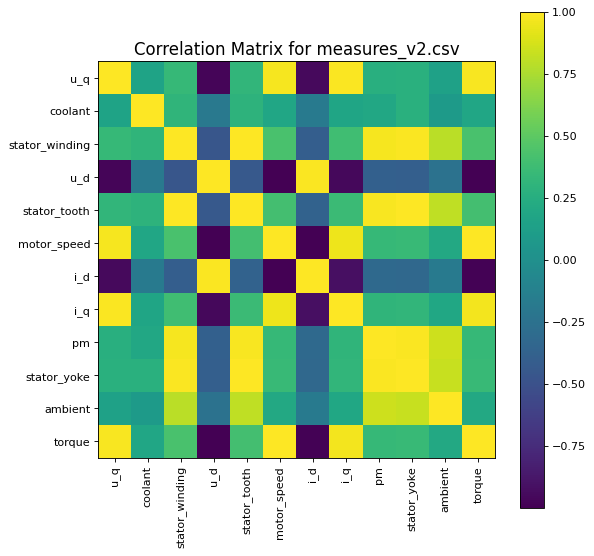

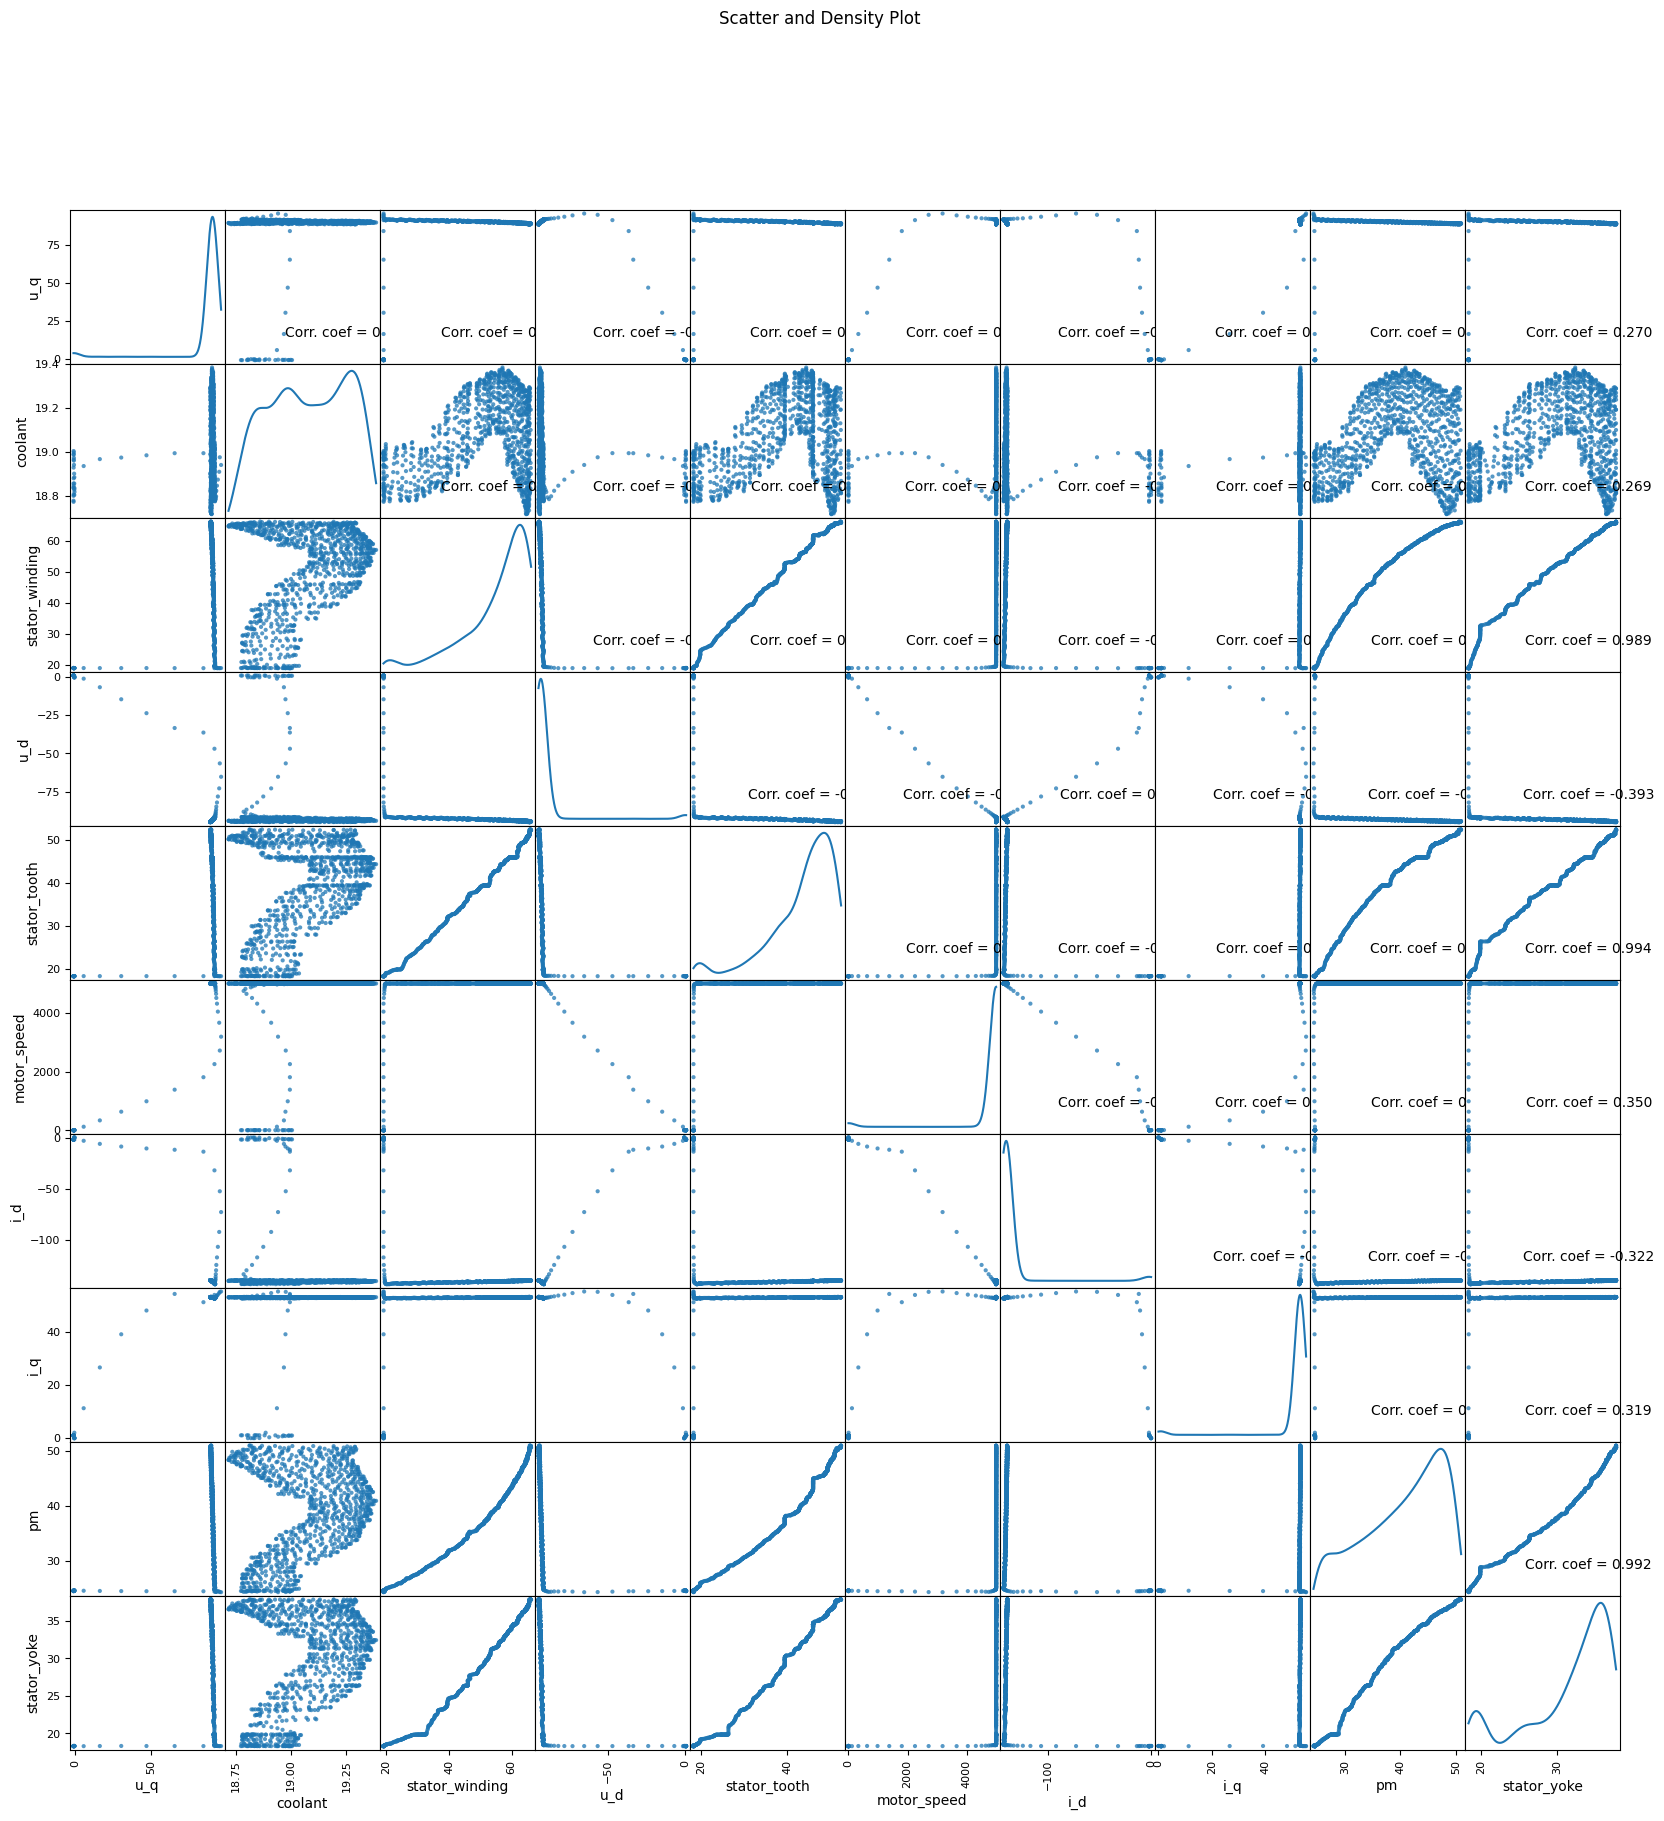

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna(axis='columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis=1, how='any')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

# Load your dataset
df1 = pd.read_csv('measures_v2.csv', delimiter=',', nrows=1000)
df1.dataframeName = 'measures_v2.csv'

# Plot distribution graphs
plotPerColumnDistribution(df1, 10, 5)

# Plot correlation matrix
plotCorrelationMatrix(df1, 8)

# Plot scatter matrix
plotScatterMatrix(df1, 20, 10)


Random Forest Results:
Accuracy: 0.8472222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       123
           1       0.00      0.00      0.00        21

    accuracy                           0.85       144
   macro avg       0.43      0.50      0.46       144
weighted avg       0.73      0.85      0.78       144


Decision Tree Results:
Accuracy: 0.7430555555555556
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       123
           1       0.14      0.14      0.14        21

    accuracy                           0.74       144
   macro avg       0.49      0.49      0.49       144
weighted avg       0.75      0.74      0.75       144


Logistic Regression Results:
Accuracy: 0.8541666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       123
 

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted s

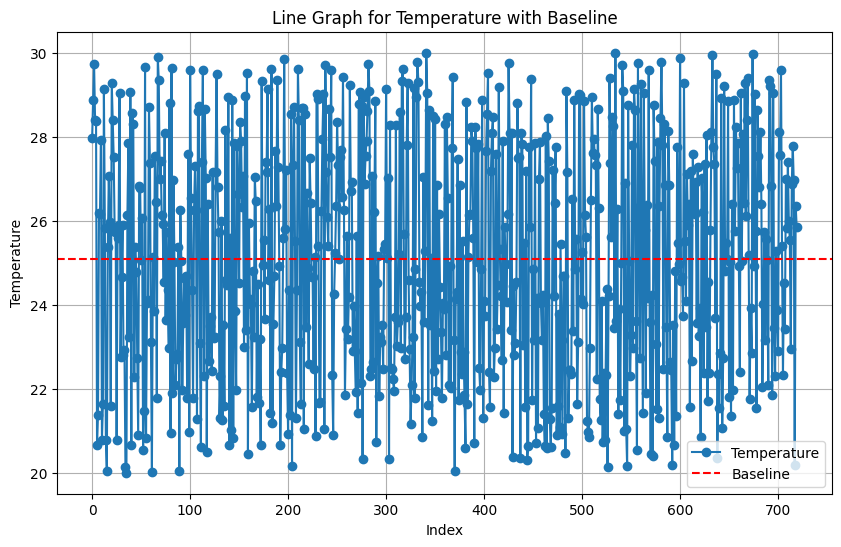

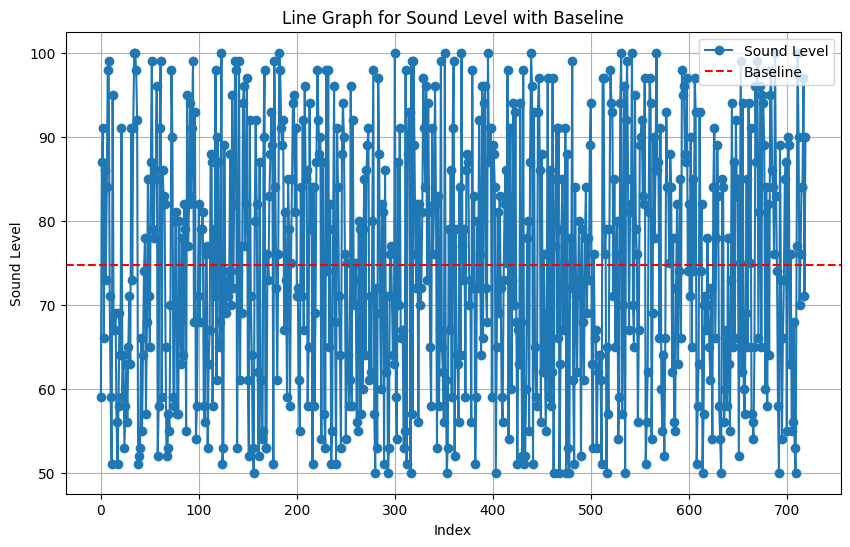

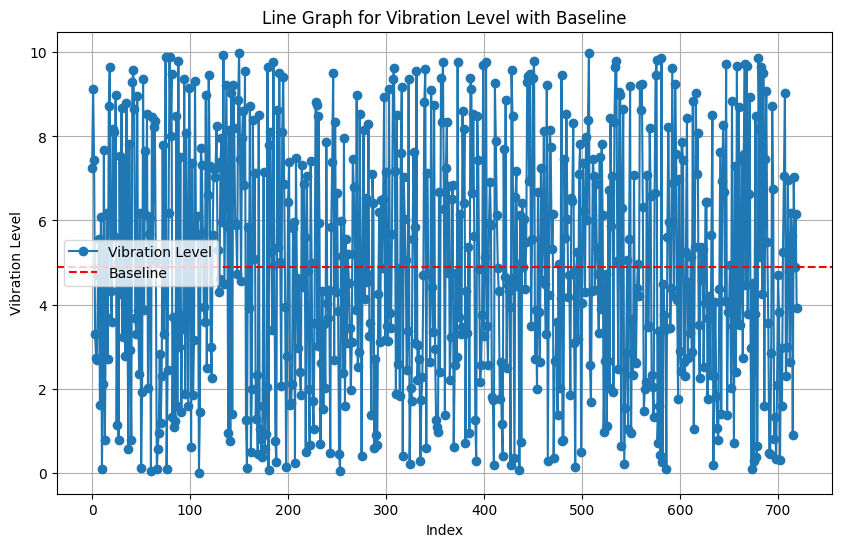

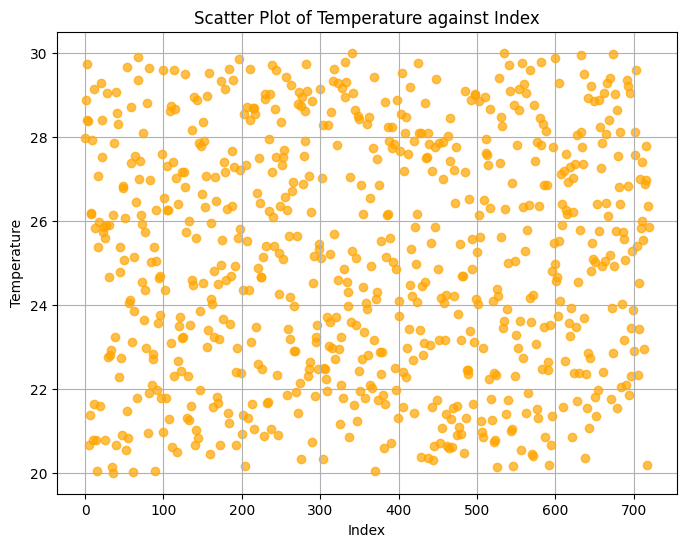

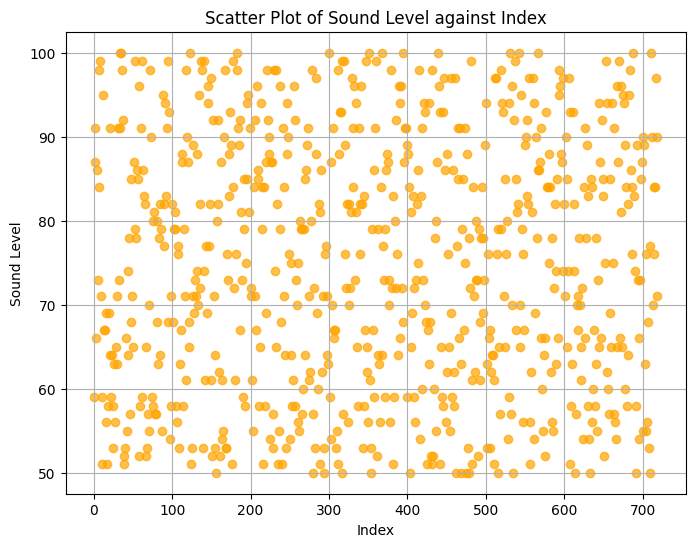

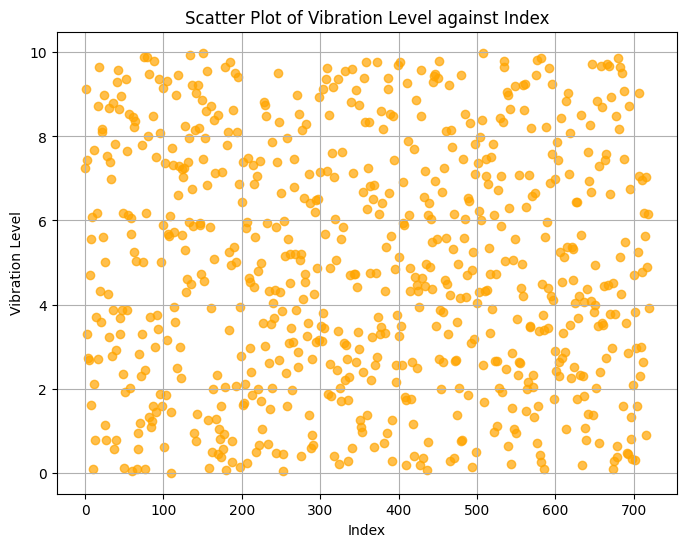

ValueError: could not convert string to float: '00:00:00'

<Figure size 800x600 with 0 Axes>

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'random_dataset.csv' with your actual dataset file)
df = pd.read_csv('random_dataset.csv')

# Preprocess the data
label_encoder = LabelEncoder()
df['Anomaly'] = label_encoder.fit_transform(df['Anomaly'])

# Define features and target
features = ['Temperature', 'Sound Level', 'Vibration Level']
target = 'Anomaly'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
rf_predictions = rf_classifier.predict(X_test_scaled)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))

# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)
dt_predictions = dt_classifier.predict(X_test_scaled)

print("\nDecision Tree Results:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))

# Logistic Regression
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train_scaled, y_train)
lr_predictions = lr_classifier.predict(X_test_scaled)

print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("Classification Report:\n", classification_report(y_test, lr_predictions))

# k-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)
knn_predictions = knn_classifier.predict(X_test_scaled)

print("\nk-Nearest Neighbors (KNN) Results:")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Classification Report:\n", classification_report(y_test, knn_predictions))

# Support Vector Machine (SVM)
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_scaled, y_train)
svm_predictions = svm_classifier.predict(X_test_scaled)

print("\nSupport Vector Machine (SVM) Results:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions))

# Plotting line graphs for each feature with baseline
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[feature], marker='o', linestyle='-', label=f'{feature}')
    plt.axhline(y=df[feature].mean(), color='r', linestyle='--', label='Baseline')
    plt.title(f'Line Graph for {feature} with Baseline')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.legend()
    plt.grid(True)
    plt.show()

# Scatter plot for each feature against the index
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(df.index, df[feature], color='orange', alpha=0.7)
    plt.title(f'Scatter Plot of {feature} against Index')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.grid(True)
    plt.show()

# Heatmap to show the correlation between features
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Random Forest Results:
Accuracy: 0.8472222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       123
           1       0.00      0.00      0.00        21

    accuracy                           0.85       144
   macro avg       0.43      0.50      0.46       144
weighted avg       0.73      0.85      0.78       144


Decision Tree Results:
Accuracy: 0.7430555555555556
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       123
           1       0.14      0.14      0.14        21

    accuracy                           0.74       144
   macro avg       0.49      0.49      0.49       144
weighted avg       0.75      0.74      0.75       144


Logistic Regression Results:
Accuracy: 0.8541666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       123
 

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted s

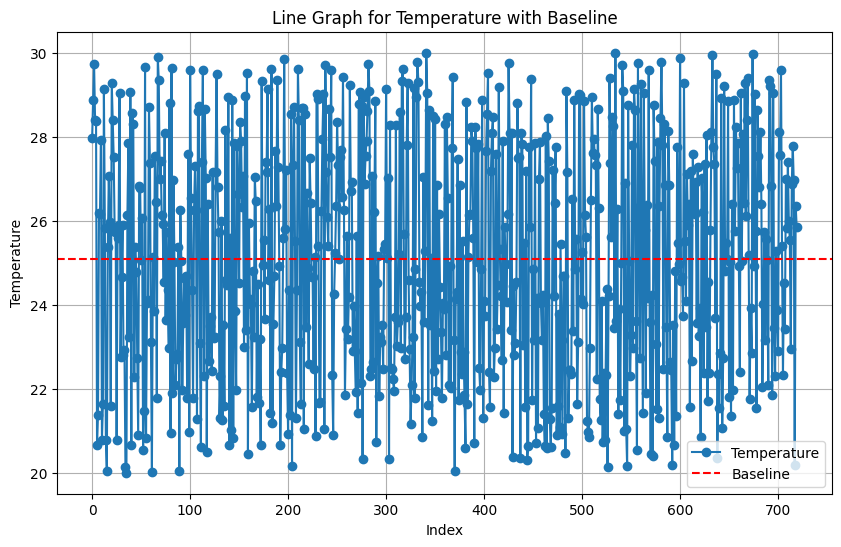

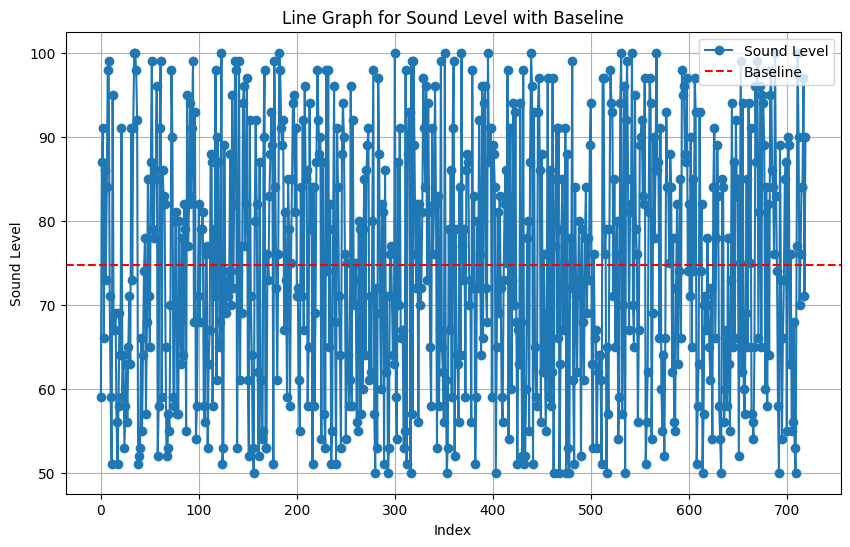

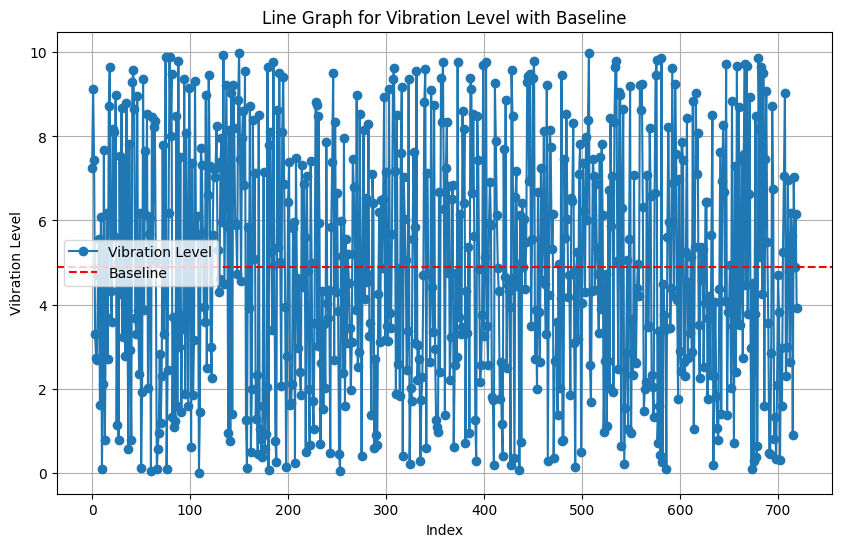

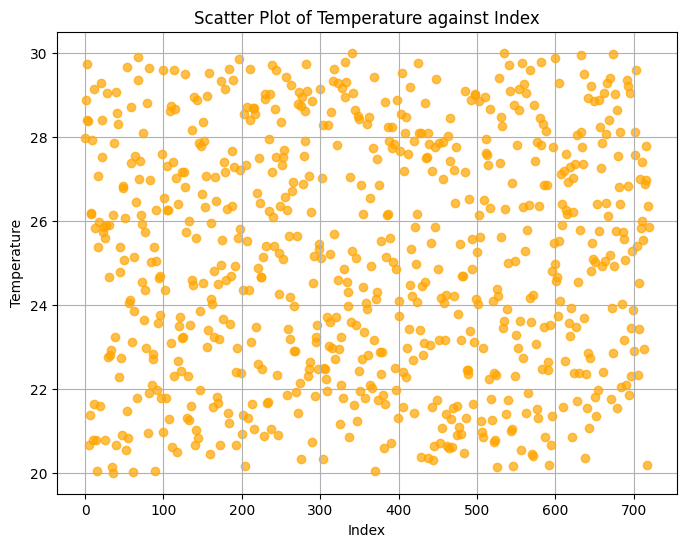

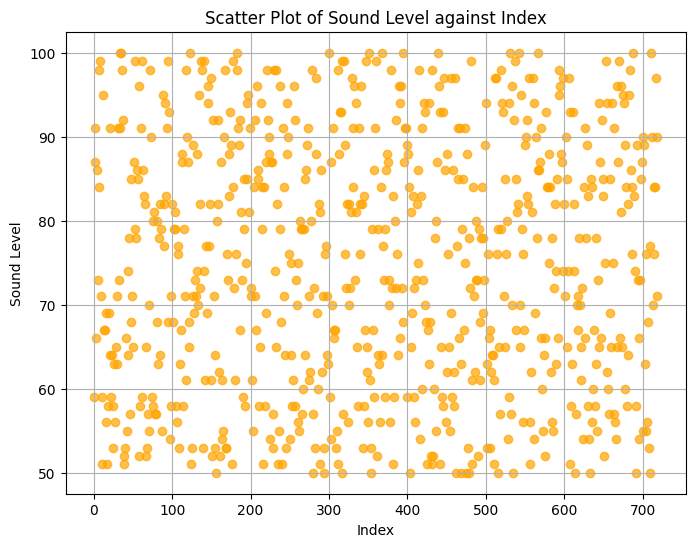

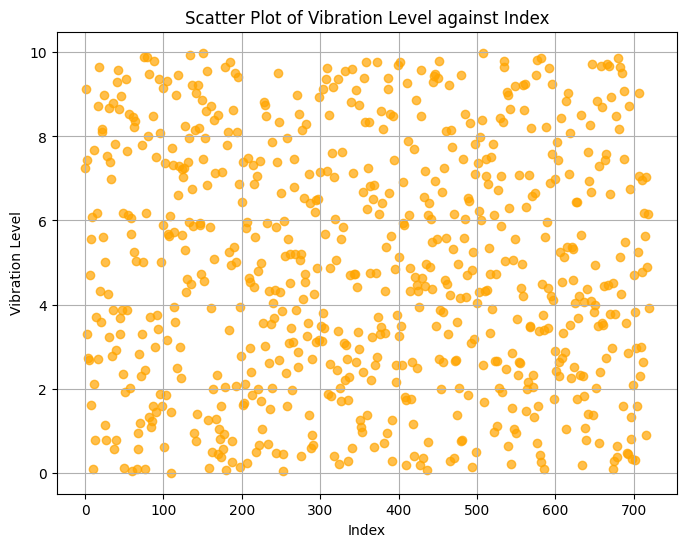

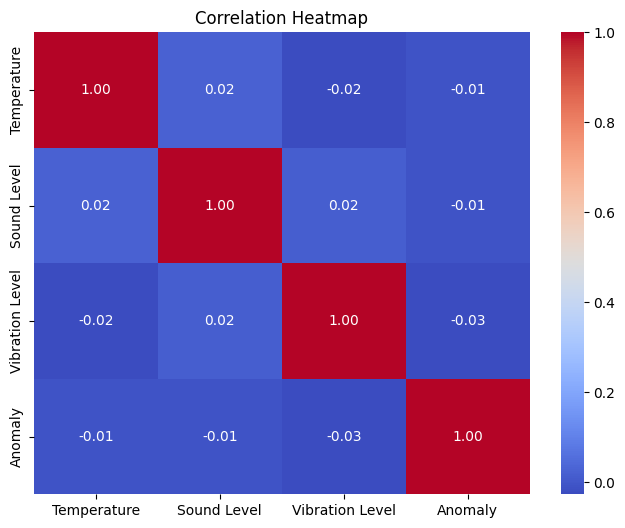

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Load your dataset (replace 'random_dataset.csv' with your actual dataset file)
df = pd.read_csv('random_dataset.csv')

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Preprocess the data
label_encoder = LabelEncoder()
df_numeric['Anomaly'] = label_encoder.fit_transform(df_numeric['Anomaly'])

# Define features and target
features = ['Temperature', 'Sound Level', 'Vibration Level']
target = 'Anomaly'

X = df_numeric[features]
y = df_numeric[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
rf_predictions = rf_classifier.predict(X_test_scaled)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))

# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)
dt_predictions = dt_classifier.predict(X_test_scaled)

print("\nDecision Tree Results:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))

# Logistic Regression
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train_scaled, y_train)
lr_predictions = lr_classifier.predict(X_test_scaled)

print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("Classification Report:\n", classification_report(y_test, lr_predictions))

# k-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)
knn_predictions = knn_classifier.predict(X_test_scaled)

print("\nk-Nearest Neighbors (KNN) Results:")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Classification Report:\n", classification_report(y_test, knn_predictions))

# Support Vector Machine (SVM)
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_scaled, y_train)
svm_predictions = svm_classifier.predict(X_test_scaled)

print("\nSupport Vector Machine (SVM) Results:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions))

# Plotting line graphs for each feature with baseline
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[feature], marker='o', linestyle='-', label=f'{feature}')
    plt.axhline(y=df[feature].mean(), color='r', linestyle='--', label='Baseline')
    plt.title(f'Line Graph for {feature} with Baseline')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.legend()
    plt.grid(True)
    plt.show()

# Scatter plot for each feature against the index
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(df.index, df[feature], color='orange', alpha=0.7)
    plt.title(f'Scatter Plot of {feature} against Index')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.grid(True)
    plt.show()

# Heatmap to show the correlation between features
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Random Forest Results:
Accuracy: 0.9652777777777778
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       139
           1       0.00      0.00      0.00         5

    accuracy                           0.97       144
   macro avg       0.48      0.50      0.49       144
weighted avg       0.93      0.97      0.95       144


Decision Tree Results:
Accuracy: 0.9305555555555556
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       139
           1       0.00      0.00      0.00         5

    accuracy                           0.93       144
   macro avg       0.48      0.48      0.48       144
weighted avg       0.93      0.93      0.93       144



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Logistic Regression Results:
Accuracy: 0.9652777777777778
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       139
           1       0.00      0.00      0.00         5

    accuracy                           0.97       144
   macro avg       0.48      0.50      0.49       144
weighted avg       0.93      0.97      0.95       144


k-Nearest Neighbors (KNN) Results:
Accuracy: 0.9652777777777778
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       139
           1       0.00      0.00      0.00         5

    accuracy                           0.97       144
   macro avg       0.48      0.50      0.49       144
weighted avg       0.93      0.97      0.95       144



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Support Vector Machine (SVM) Results:
Accuracy: 0.9652777777777778
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       139
           1       0.00      0.00      0.00         5

    accuracy                           0.97       144
   macro avg       0.48      0.50      0.49       144
weighted avg       0.93      0.97      0.95       144



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


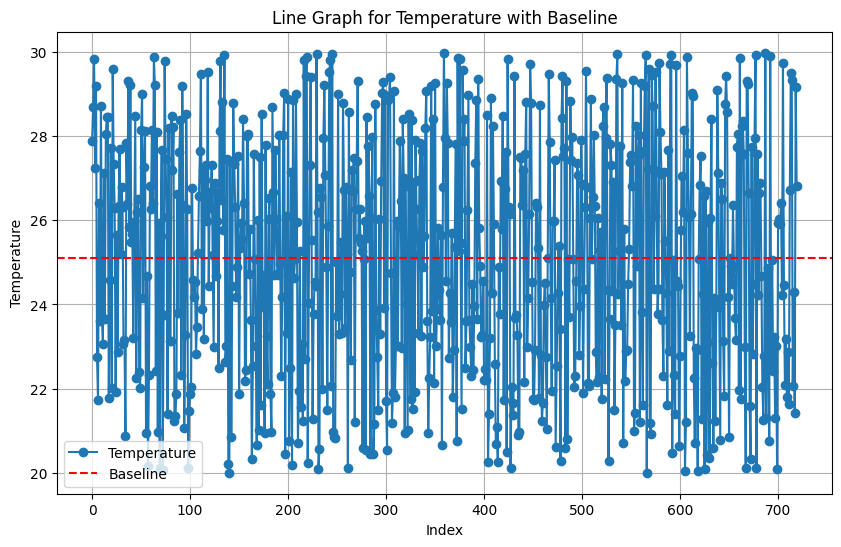

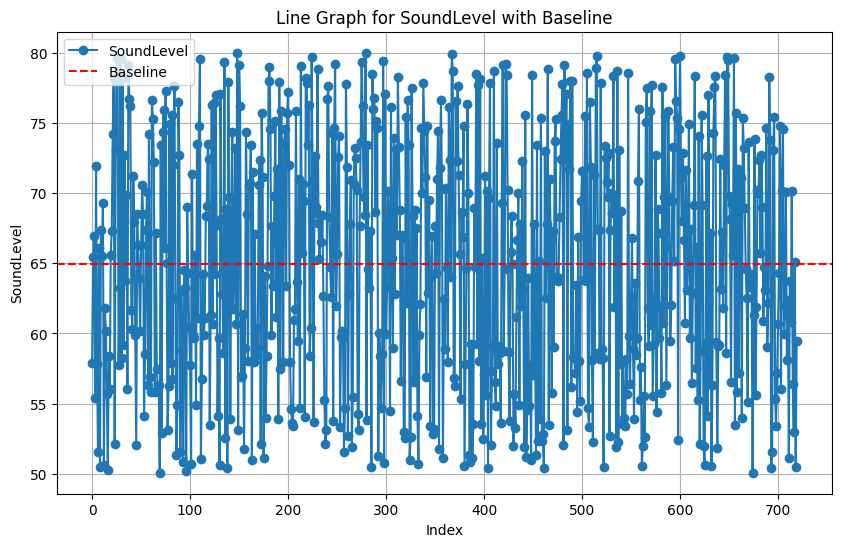

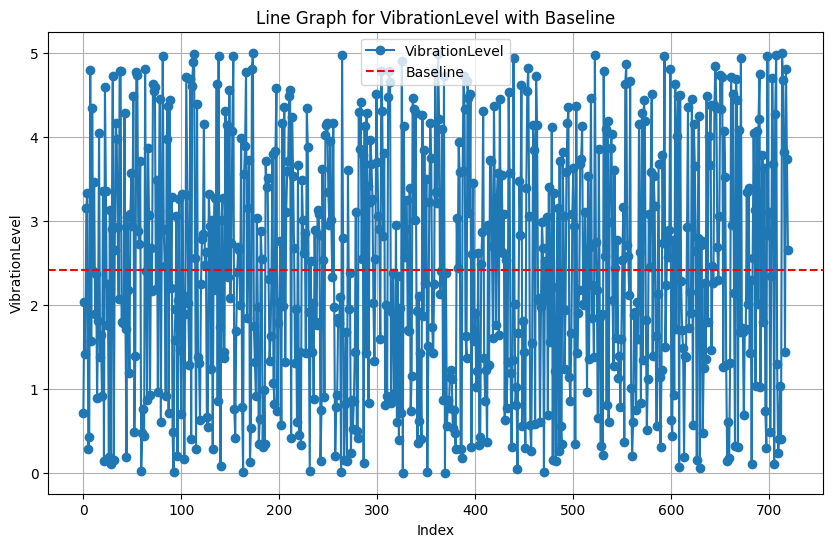


Random Forest Feature Importance:
Temperature: 0.29554783024483217
SoundLevel: 0.35448697370433757
VibrationLevel: 0.34996519605083026

Decision Tree Feature Importance:
Temperature: 0.26680041982079894
SoundLevel: 0.28279497853074603
VibrationLevel: 0.4504046016484551

Logistic Regression Coefficients:
Temperature: 0.22186279680764667
SoundLevel: 0.03757169397714148
VibrationLevel: 0.005290641195743845

SHAP Values for Logistic Regression:


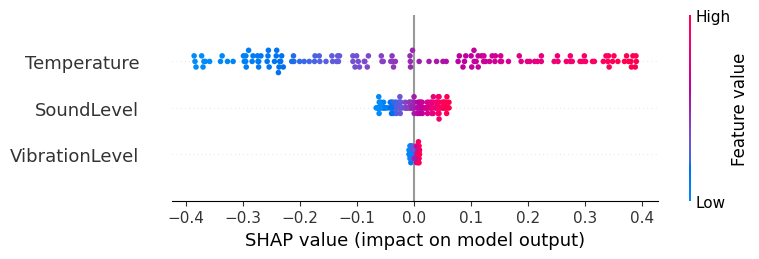

AttributeError: module 'shap.utils' has no attribute 'permutation_importances'

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import shap
import matplotlib.pyplot as plt

# Load your dataset (replace 'random_dataset.csv' with your actual dataset file)
# df = pd.read_csv('random_dataset.csv')
df = pd.read_csv('generated_data_with_anomalies.csv')

# Preprocess the data
label_encoder = LabelEncoder()
df['Anomaly'] = label_encoder.fit_transform(df['Anomaly'])

# Define features and target
features = ['Temperature', 'SoundLevel', 'VibrationLevel']
target = 'Anomaly'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
rf_predictions = rf_classifier.predict(X_test_scaled)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))

# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)
dt_predictions = dt_classifier.predict(X_test_scaled)

print("\nDecision Tree Results:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))

# Logistic Regression
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train_scaled, y_train)
lr_predictions = lr_classifier.predict(X_test_scaled)

print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("Classification Report:\n", classification_report(y_test, lr_predictions))

# k-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)
knn_predictions = knn_classifier.predict(X_test_scaled)

print("\nk-Nearest Neighbors (KNN) Results:")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Classification Report:\n", classification_report(y_test, knn_predictions))

# Support Vector Machine (SVM)
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_scaled, y_train)
svm_predictions = svm_classifier.predict(X_test_scaled)

print("\nSupport Vector Machine (SVM) Results:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions))

# Plotting line graphs for each feature with baseline
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[feature], marker='o', linestyle='-', label=f'{feature}')
    plt.axhline(y=df[feature].mean(), color='r', linestyle='--', label='Baseline')
    plt.title(f'Line Graph for {feature} with Baseline')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.legend()
    plt.grid(True)
    plt.show()

# Random Forest Feature Importance
rf_feature_importance = rf_classifier.feature_importances_
print("\nRandom Forest Feature Importance:")
for i in range(len(features)):
    print(f"{features[i]}: {rf_feature_importance[i]}")

# Decision Tree Feature Importance
dt_feature_importance = dt_classifier.feature_importances_
print("\nDecision Tree Feature Importance:")
for i in range(len(features)):
    print(f"{features[i]}: {dt_feature_importance[i]}")

# Logistic Regression Coefficients
lr_coefficients = lr_classifier.coef_[0]
print("\nLogistic Regression Coefficients:")
for i in range(len(features)):
    print(f"{features[i]}: {lr_coefficients[i]}")

# Initialize SHAP explainer for Logistic Regression
explainer = shap.Explainer(lr_classifier, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)

# Plot SHAP summary plot for Logistic Regression
print("\nSHAP Values for Logistic Regression:")
shap.summary_plot(shap_values, X_test_scaled, feature_names=features)

# Permutation Importance for k-Nearest Neighbors
knn_permutation_importance = shap.utils.permutation_importances(
    knn_classifier.predict, X_test_scaled, metric="accuracy"
)
print("\nk-Nearest Neighbors Permutation Importance:")
for i in range(len(features)):
    print(f"{features[i]}: {knn_permutation_importance[i]}")

# Permutation Importance for Support Vector Machine
svm_permutation_importance = shap.utils.permutation_importances(
    svm_classifier.predict, X_test_scaled, metric="accuracy"
)
print("\nSupport Vector Machine Permutation Importance:")
for i in range(len(features)):
    print(f"{features[i]}: {svm_permutation_importance[i]}")


Random Forest Results:
Accuracy: 0.9652777777777778
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       139
           1       0.00      0.00      0.00         5

    accuracy                           0.97       144
   macro avg       0.48      0.50      0.49       144
weighted avg       0.93      0.97      0.95       144


Decision Tree Results:
Accuracy: 0.9305555555555556
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       139
           1       0.00      0.00      0.00         5

    accuracy                           0.93       144
   macro avg       0.48      0.48      0.48       144
weighted avg       0.93      0.93      0.93       144


Logistic Regression Results:
Accuracy: 0.9652777777777778
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       139
 

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted s

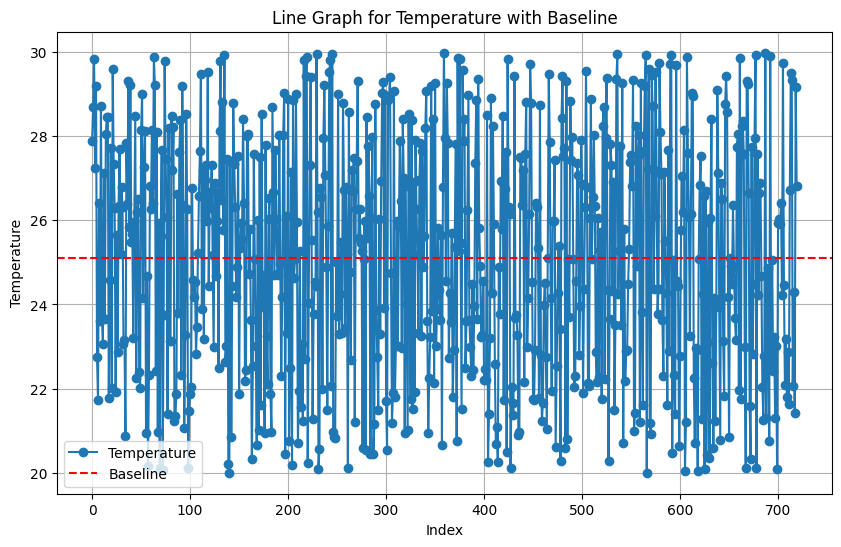

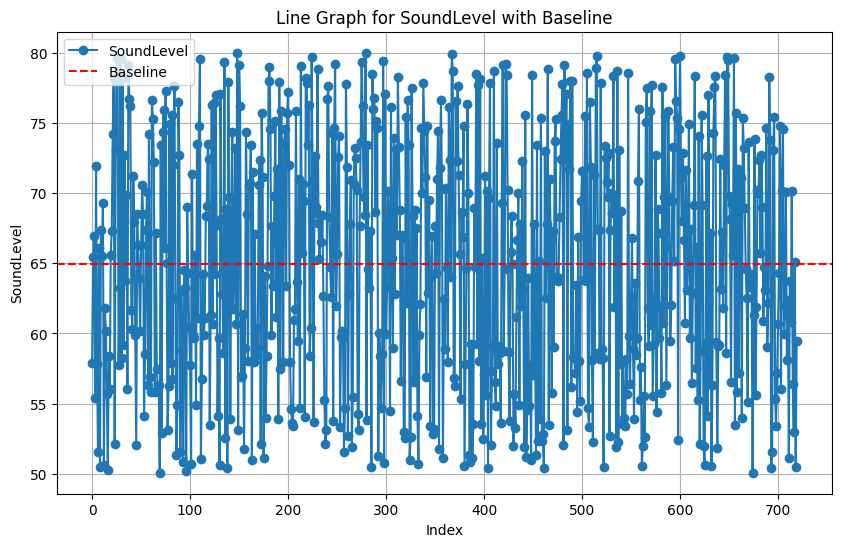

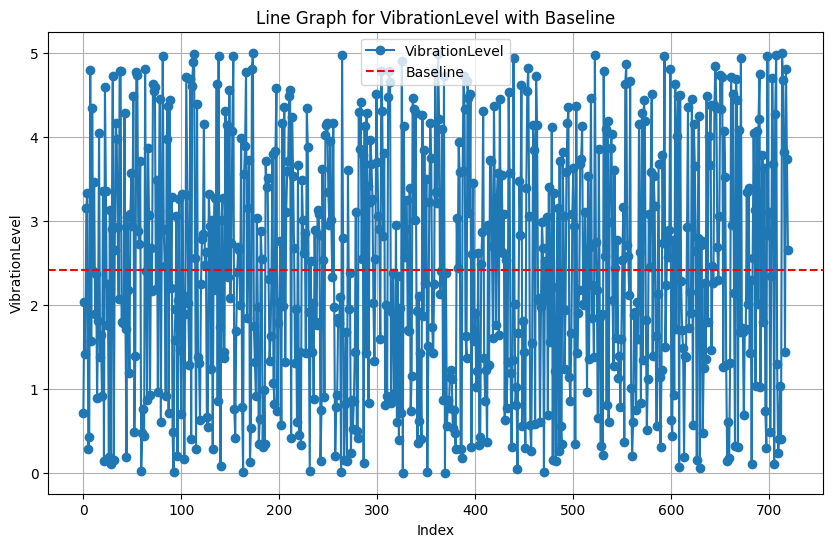


Random Forest Feature Importance:
Temperature: 0.29554783024483217
SoundLevel: 0.35448697370433757
VibrationLevel: 0.34996519605083026

Decision Tree Feature Importance:
Temperature: 0.26680041982079894
SoundLevel: 0.28279497853074603
VibrationLevel: 0.4504046016484551

Logistic Regression Coefficients:
Temperature: 0.22186279680764665
SoundLevel: 0.03757169397714152
VibrationLevel: 0.005290641195743864

SHAP Values for Logistic Regression:


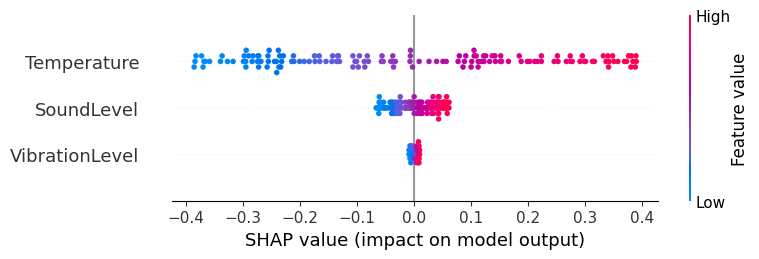


k-Nearest Neighbors Permutation Importance:
Temperature: 0.0
SoundLevel: 0.0
VibrationLevel: 0.0

Support Vector Machine Permutation Importance:
Temperature: 0.0
SoundLevel: 0.0
VibrationLevel: 0.0


In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import shap
import matplotlib.pyplot as plt

# Load your dataset (replace 'random_dataset.csv' with your actual dataset file)
# df = pd.read_csv('random_dataset.csv')
df = pd.read_csv('generated_data_with_anomalies.csv')

# Preprocess the data
label_encoder = LabelEncoder()
df['Anomaly'] = label_encoder.fit_transform(df['Anomaly'])

# Define features and target
features = ['Temperature', 'SoundLevel', 'VibrationLevel']
target = 'Anomaly'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
rf_predictions = rf_classifier.predict(X_test_scaled)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))

# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)
dt_predictions = dt_classifier.predict(X_test_scaled)

print("\nDecision Tree Results:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))

# Logistic Regression
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train_scaled, y_train)
lr_predictions = lr_classifier.predict(X_test_scaled)

print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("Classification Report:\n", classification_report(y_test, lr_predictions))

# k-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)
knn_predictions = knn_classifier.predict(X_test_scaled)

print("\nk-Nearest Neighbors (KNN) Results:")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Classification Report:\n", classification_report(y_test, knn_predictions))

# Support Vector Machine (SVM)
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_scaled, y_train)
svm_predictions = svm_classifier.predict(X_test_scaled)

print("\nSupport Vector Machine (SVM) Results:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions))

# Plotting line graphs for each feature with baseline
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[feature], marker='o', linestyle='-', label=f'{feature}')
    plt.axhline(y=df[feature].mean(), color='r', linestyle='--', label='Baseline')
    plt.title(f'Line Graph for {feature} with Baseline')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.legend()
    plt.grid(True)
    plt.show()

# Random Forest Feature Importance
rf_feature_importance = rf_classifier.feature_importances_
print("\nRandom Forest Feature Importance:")
for i in range(len(features)):
    print(f"{features[i]}: {rf_feature_importance[i]}")

# Decision Tree Feature Importance
dt_feature_importance = dt_classifier.feature_importances_
print("\nDecision Tree Feature Importance:")
for i in range(len(features)):
    print(f"{features[i]}: {dt_feature_importance[i]}")

# Logistic Regression Coefficients
lr_coefficients = lr_classifier.coef_[0]
print("\nLogistic Regression Coefficients:")
for i in range(len(features)):
    print(f"{features[i]}: {lr_coefficients[i]}")

# Initialize SHAP explainer for Logistic Regression
explainer = shap.Explainer(lr_classifier, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)

# Plot SHAP summary plot for Logistic Regression
print("\nSHAP Values for Logistic Regression:")
shap.summary_plot(shap_values, X_test_scaled, feature_names=features)

# Permutation Importance for k-Nearest Neighbors
knn_permutation_importance = {}
for i, feature in enumerate(features):
    X_test_permuted = X_test_scaled.copy()
    X_test_permuted[:, i] = np.random.permutation(X_test_permuted[:, i])
    accuracy_permuted = accuracy_score(y_test, knn_classifier.predict(X_test_permuted))
    knn_permutation_importance[feature] = accuracy_score(y_test, knn_predictions) - accuracy_permuted
print("\nk-Nearest Neighbors Permutation Importance:")
for feature, importance in knn_permutation_importance.items():
    print(f"{feature}: {importance}")

# Permutation Importance for Support Vector Machine
svm_permutation_importance = {}
for i, feature in enumerate(features):
    X_test_permuted = X_test_scaled.copy()
    X_test_permuted[:, i] = np.random.permutation(X_test_permuted[:, i])
    accuracy_permuted = accuracy_score(y_test, svm_classifier.predict(X_test_permuted))
    svm_permutation_importance[feature] = accuracy_score(y_test, svm_predictions) - accuracy_permuted
print("\nSupport Vector Machine Permutation Importance:")
for feature, importance in svm_permutation_importance.items():
    print(f"{feature}: {importance}")


Random Forest Results:
Accuracy: 0.9652777777777778
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       139
           1       0.00      0.00      0.00         5

    accuracy                           0.97       144
   macro avg       0.48      0.50      0.49       144
weighted avg       0.93      0.97      0.95       144


Decision Tree Results:
Accuracy: 0.9305555555555556
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       139
           1       0.00      0.00      0.00         5

    accuracy                           0.93       144
   macro avg       0.48      0.48      0.48       144
weighted avg       0.93      0.93      0.93       144


Logistic Regression Results:
Accuracy: 0.9652777777777778
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       139
 

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted s

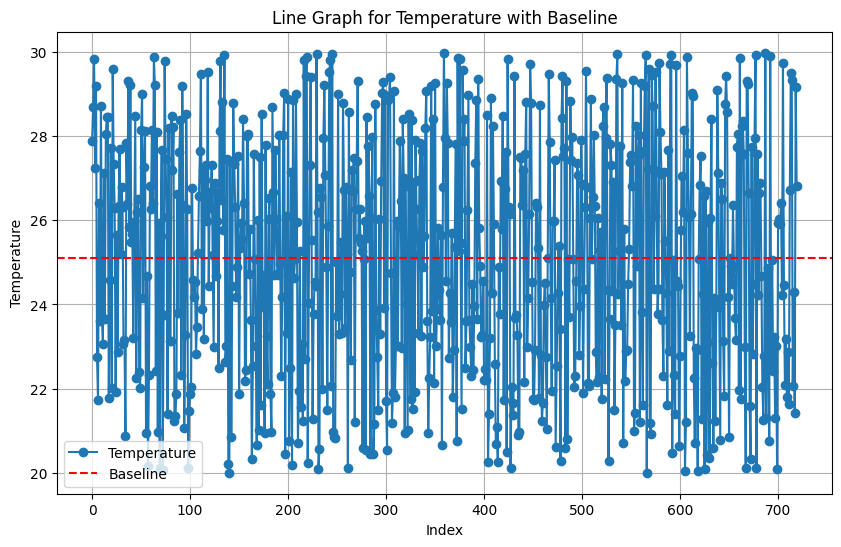

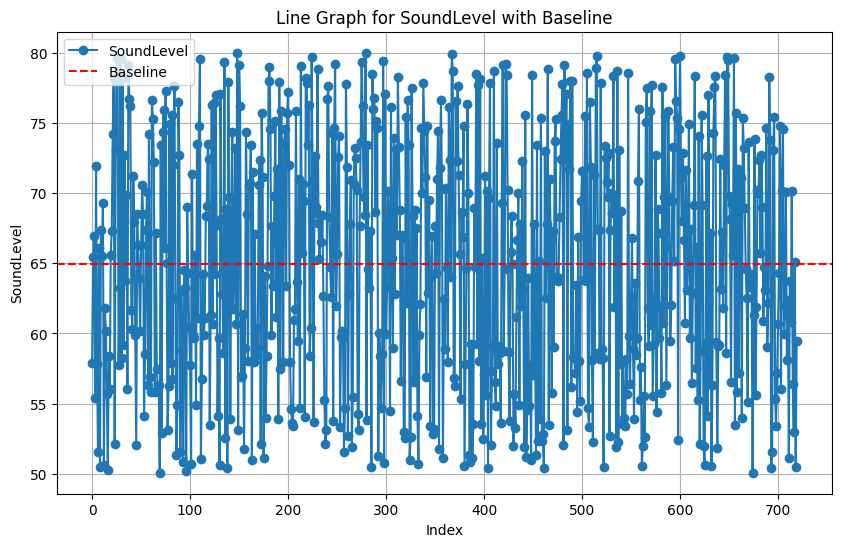

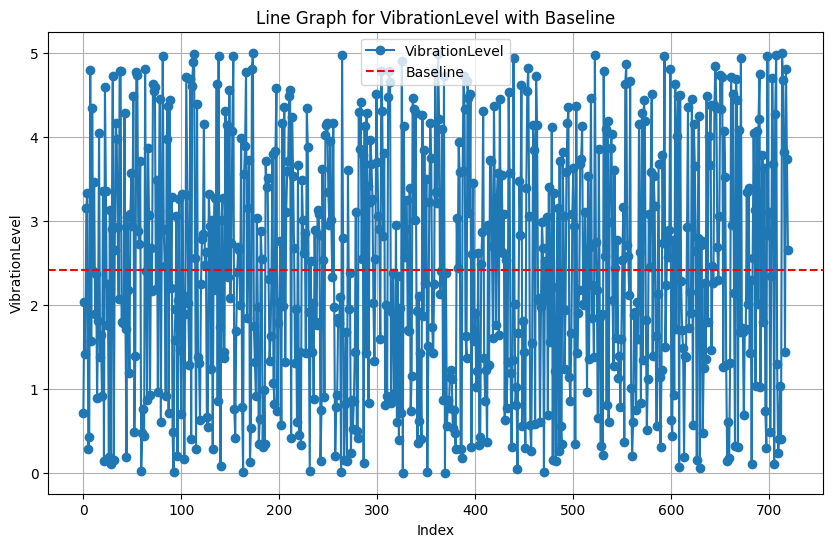


Random Forest Feature Importance:
Temperature: 0.29554783024483217
SoundLevel: 0.35448697370433757
VibrationLevel: 0.34996519605083026

Decision Tree Feature Importance:
Temperature: 0.26680041982079894
SoundLevel: 0.28279497853074603
VibrationLevel: 0.4504046016484551

Logistic Regression Coefficients:
Temperature: 0.22186279680764667
SoundLevel: 0.037571693977141496
VibrationLevel: 0.005290641195743856

k-Nearest Neighbors Permutation Importance:
Temperature: 0.001388888888888884
SoundLevel: 0.0
VibrationLevel: 0.000694444444444442

Support Vector Machine Permutation Importance:
Temperature: 0.0
SoundLevel: 0.0
VibrationLevel: 0.0


In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance

# Load your dataset (replace 'random_dataset.csv' with your actual dataset file)
# df = pd.read_csv('random_dataset.csv')
df = pd.read_csv('generated_data_with_anomalies.csv')

# Preprocess the data
label_encoder = LabelEncoder()
df['Anomaly'] = label_encoder.fit_transform(df['Anomaly'])

# Define features and target
features = ['Temperature', 'SoundLevel', 'VibrationLevel']
target = 'Anomaly'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
rf_predictions = rf_classifier.predict(X_test_scaled)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))

# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)
dt_predictions = dt_classifier.predict(X_test_scaled)

print("\nDecision Tree Results:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))

# Logistic Regression
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train_scaled, y_train)
lr_predictions = lr_classifier.predict(X_test_scaled)

print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("Classification Report:\n", classification_report(y_test, lr_predictions))

# k-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)
knn_predictions = knn_classifier.predict(X_test_scaled)

print("\nk-Nearest Neighbors (KNN) Results:")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Classification Report:\n", classification_report(y_test, knn_predictions))

# Support Vector Machine (SVM)
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_scaled, y_train)
svm_predictions = svm_classifier.predict(X_test_scaled)

print("\nSupport Vector Machine (SVM) Results:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions))

# Plotting line graphs for each feature with baseline
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[feature], marker='o', linestyle='-', label=f'{feature}')
    plt.axhline(y=df[feature].mean(), color='r', linestyle='--', label='Baseline')
    plt.title(f'Line Graph for {feature} with Baseline')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.legend()
    plt.grid(True)
    plt.show()

# Feature Importance for Random Forest
rf_feature_importance = rf_classifier.feature_importances_
print("\nRandom Forest Feature Importance:")
for i in range(len(features)):
    print(f"{features[i]}: {rf_feature_importance[i]}")

# Feature Importance for Decision Tree
dt_feature_importance = dt_classifier.feature_importances_
print("\nDecision Tree Feature Importance:")
for i in range(len(features)):
    print(f"{features[i]}: {dt_feature_importance[i]}")

# Feature Importance for Logistic Regression
lr_coefficients = lr_classifier.coef_[0]
print("\nLogistic Regression Coefficients:")
for i in range(len(features)):
    print(f"{features[i]}: {lr_coefficients[i]}")

# Permutation Importance for k-Nearest Neighbors
knn_permutation_importance = permutation_importance(knn_classifier, X_test_scaled, y_test, n_repeats=30, random_state=42)
print("\nk-Nearest Neighbors Permutation Importance:")
for i, feature in enumerate(features):
    print(f"{feature}: {knn_permutation_importance['importances_mean'][i]}")

# Permutation Importance for Support Vector Machine
svm_permutation_importance = permutation_importance(svm_classifier, X_test_scaled, y_test, n_repeats=30, random_state=42)
print("\nSupport Vector Machine Permutation Importance:")
for i, feature in enumerate(features):
    print(f"{feature}: {svm_permutation_importance['importances_mean'][i]}")


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Random Forest Results:
Accuracy: 0.9652777777777778
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       139
           1       0.00      0.00      0.00         5

    accuracy                           0.97       144
   macro avg       0.48      0.50      0.49       144
weighted avg       0.93      0.97      0.95       144


Decision Tree Results:
Accuracy: 0.9305555555555556
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       139
           1       0.00      0.00      0.00         5

    accuracy                           0.93       144
   macro avg       0.48      0.48      0.48       144
weighted avg       0.93      0.93      0.93       144



/glob/development-tools/versions/oneapi/2023.2.0.1/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/glob/development-tools/versions/oneapi/2023.2.0.1/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/glob/development-tools/versions/oneapi/2023.2.0.1/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in


Logistic Regression Results:
Accuracy: 0.9652777777777778
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       139
           1       0.00      0.00      0.00         5

    accuracy                           0.97       144
   macro avg       0.48      0.50      0.49       144
weighted avg       0.93      0.97      0.95       144


k-Nearest Neighbors (KNN) Results:
Accuracy: 0.9652777777777778
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       139
           1       0.00      0.00      0.00         5

    accuracy                           0.97       144
   macro avg       0.48      0.50      0.49       144
weighted avg       0.93      0.97      0.95       144



/glob/development-tools/versions/oneapi/2023.2.0.1/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/glob/development-tools/versions/oneapi/2023.2.0.1/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/glob/development-tools/versions/oneapi/2023.2.0.1/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in


Support Vector Machine (SVM) Results:
Accuracy: 0.9652777777777778
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       139
           1       0.00      0.00      0.00         5

    accuracy                           0.97       144
   macro avg       0.48      0.50      0.49       144
weighted avg       0.93      0.97      0.95       144



/glob/development-tools/versions/oneapi/2023.2.0.1/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/glob/development-tools/versions/oneapi/2023.2.0.1/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/glob/development-tools/versions/oneapi/2023.2.0.1/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in

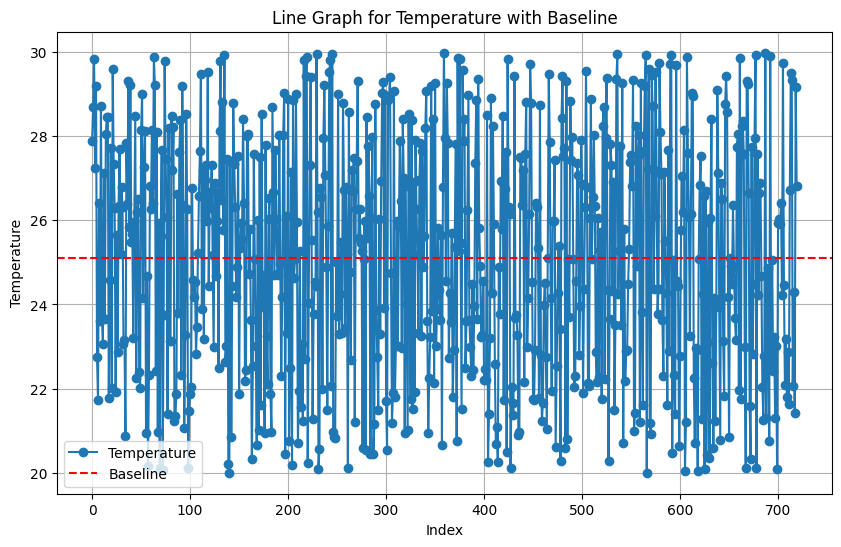

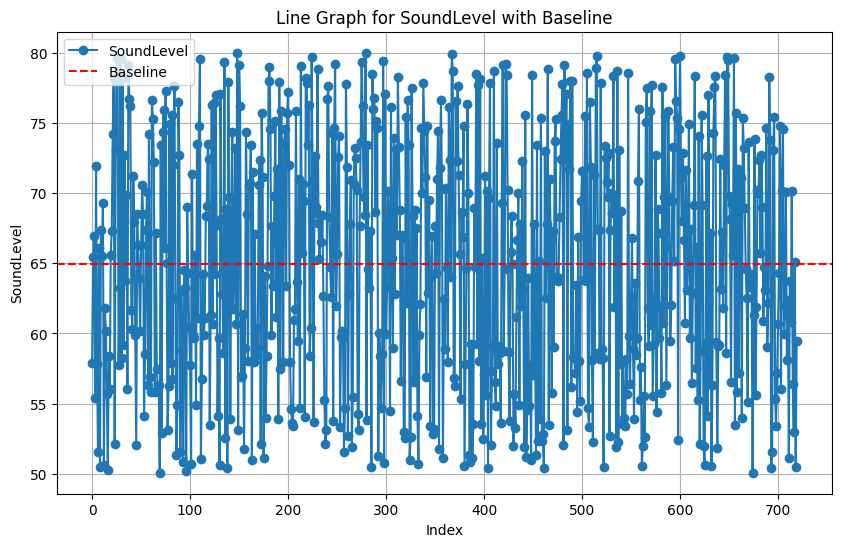

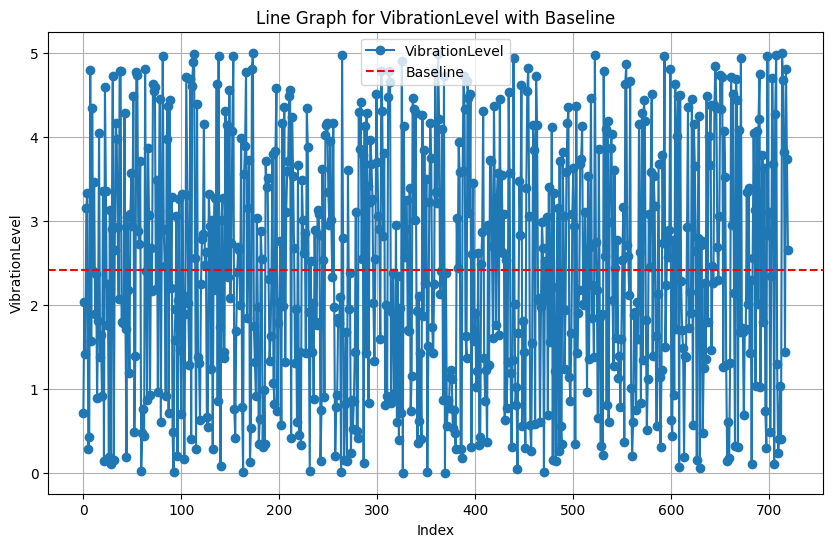


Random Forest Feature Importance:
Temperature: 0.29554783024483217
SoundLevel: 0.35448697370433757
VibrationLevel: 0.34996519605083026

Decision Tree Feature Importance:
Temperature: 0.26680041982079894
SoundLevel: 0.28279497853074603
VibrationLevel: 0.4504046016484551

Logistic Regression Coefficients:
Temperature: 0.22186279680764667
SoundLevel: 0.0375716939771415
VibrationLevel: 0.005290641195743868

k-Nearest Neighbors Permutation Importance:
Temperature: 0.001388888888888884
SoundLevel: 0.0
VibrationLevel: 0.000694444444444442

Support Vector Machine Permutation Importance:
Temperature: 0.0
SoundLevel: 0.0
VibrationLevel: 0.0


/home/u213345/tmp/ipykernel_410480/3193706623.py:133: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True, color='b', label='Density')


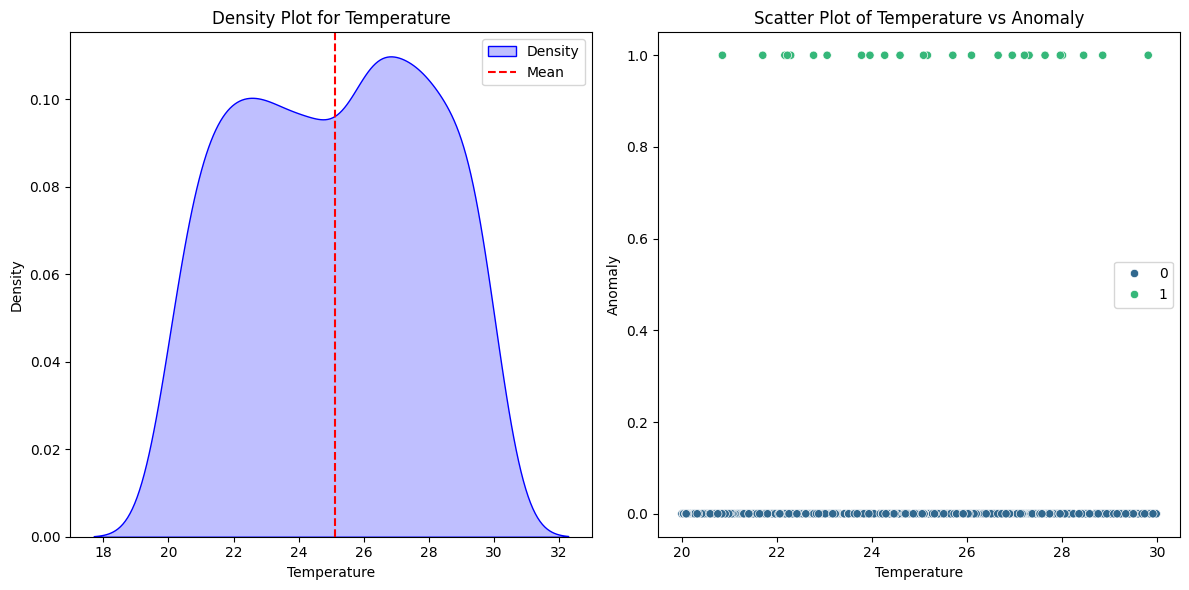

/home/u213345/tmp/ipykernel_410480/3193706623.py:133: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True, color='b', label='Density')


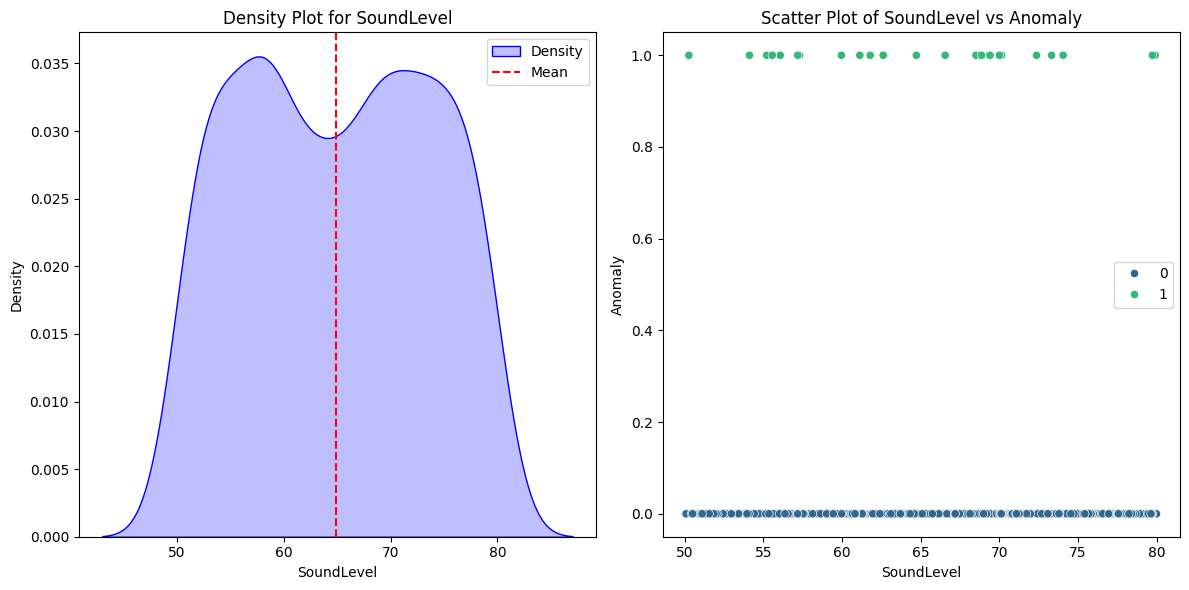

/home/u213345/tmp/ipykernel_410480/3193706623.py:133: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True, color='b', label='Density')


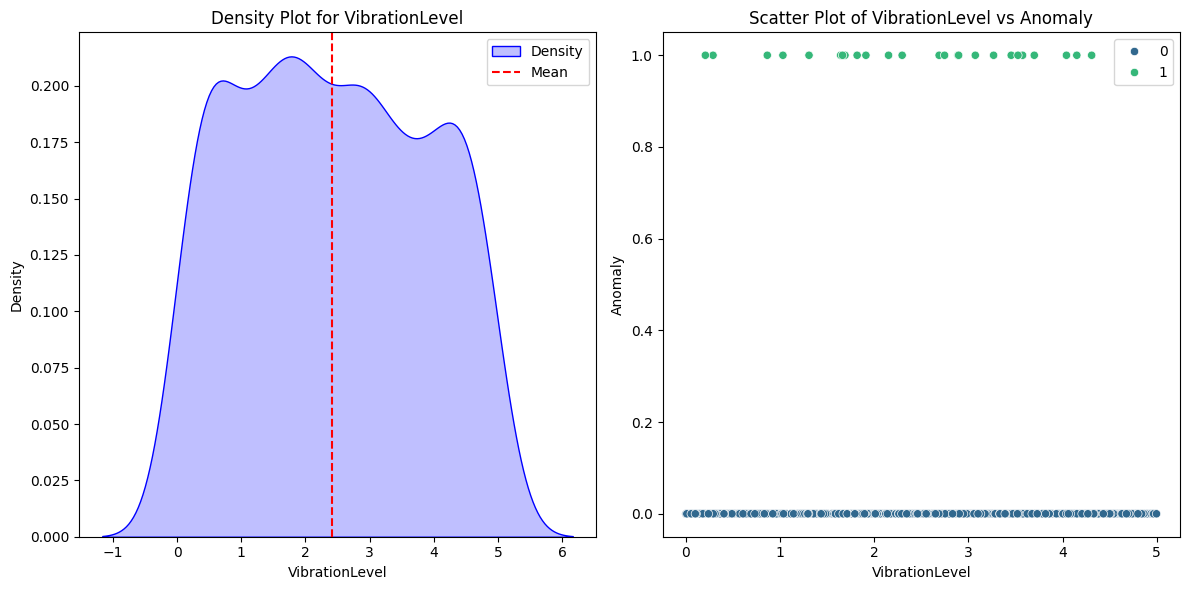

In [1]:
import seaborn as sns
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance

# Load your dataset (replace 'random_dataset.csv' with your actual dataset file)
# df = pd.read_csv('random_dataset.csv')
df = pd.read_csv('generated_data_with_anomalies.csv')

# Preprocess the data
label_encoder = LabelEncoder()
df['Anomaly'] = label_encoder.fit_transform(df['Anomaly'])

# Define features and target
features = ['Temperature', 'SoundLevel', 'VibrationLevel']
target = 'Anomaly'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
rf_predictions = rf_classifier.predict(X_test_scaled)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))

# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)
dt_predictions = dt_classifier.predict(X_test_scaled)

print("\nDecision Tree Results:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))

# Logistic Regression
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train_scaled, y_train)
lr_predictions = lr_classifier.predict(X_test_scaled)

print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("Classification Report:\n", classification_report(y_test, lr_predictions))

# k-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)
knn_predictions = knn_classifier.predict(X_test_scaled)

print("\nk-Nearest Neighbors (KNN) Results:")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Classification Report:\n", classification_report(y_test, knn_predictions))

# Support Vector Machine (SVM)
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_scaled, y_train)
svm_predictions = svm_classifier.predict(X_test_scaled)

print("\nSupport Vector Machine (SVM) Results:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions))

# Plotting line graphs for each feature with baseline
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[feature], marker='o', linestyle='-', label=f'{feature}')
    plt.axhline(y=df[feature].mean(), color='r', linestyle='--', label='Baseline')
    plt.title(f'Line Graph for {feature} with Baseline')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.legend()
    plt.grid(True)
    plt.show()

# Feature Importance for Random Forest
rf_feature_importance = rf_classifier.feature_importances_
print("\nRandom Forest Feature Importance:")
for i in range(len(features)):
    print(f"{features[i]}: {rf_feature_importance[i]}")

# Feature Importance for Decision Tree
dt_feature_importance = dt_classifier.feature_importances_
print("\nDecision Tree Feature Importance:")
for i in range(len(features)):
    print(f"{features[i]}: {dt_feature_importance[i]}")

# Feature Importance for Logistic Regression
lr_coefficients = lr_classifier.coef_[0]
print("\nLogistic Regression Coefficients:")
for i in range(len(features)):
    print(f"{features[i]}: {lr_coefficients[i]}")

# Permutation Importance for k-Nearest Neighbors
knn_permutation_importance = permutation_importance(knn_classifier, X_test_scaled, y_test, n_repeats=30, random_state=42)
print("\nk-Nearest Neighbors Permutation Importance:")
for i, feature in enumerate(features):
    print(f"{feature}: {knn_permutation_importance['importances_mean'][i]}")

# Permutation Importance for Support Vector Machine
svm_permutation_importance = permutation_importance(svm_classifier, X_test_scaled, y_test, n_repeats=30, random_state=42)
print("\nSupport Vector Machine Permutation Importance:")
for i, feature in enumerate(features):
    print(f"{feature}: {svm_permutation_importance['importances_mean'][i]}")

# Plotting density and scatter plots for each feature
for feature in features:
    plt.figure(figsize=(12, 6))
    
    # Density plot
    plt.subplot(1, 2, 1)
    sns.kdeplot(df[feature], shade=True, color='b', label='Density')
    plt.axvline(x=df[feature].mean(), color='r', linestyle='--', label='Mean')
    plt.title(f'Density Plot for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    
    # Scatter plot
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=df[feature], y=df['Anomaly'], hue=df['Anomaly'], palette='viridis')
    plt.title(f'Scatter Plot of {feature} vs Anomaly')
    plt.xlabel(feature)
    plt.ylabel('Anomaly')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


/home/u213345/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


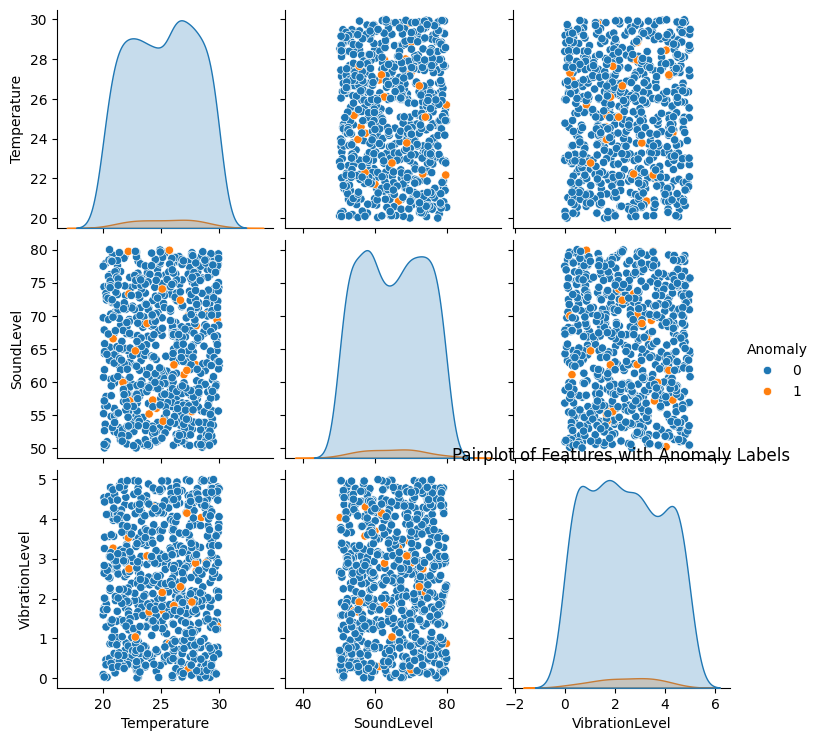

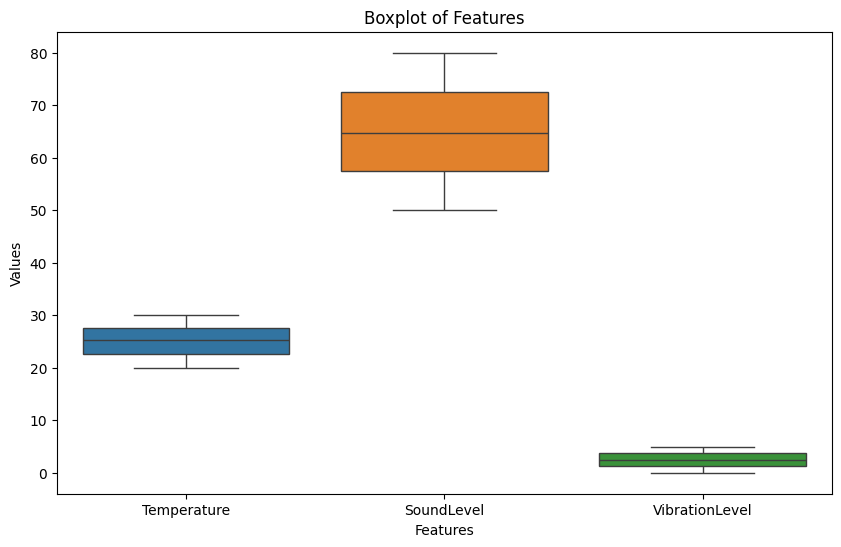

In [3]:
# Pairplot for visualizing relationships between features
import seaborn as sns
sns.pairplot(df, hue='Anomaly', diag_kind='kde')
plt.title('Pairplot of Features with Anomaly Labels')
plt.show()

# Box plot to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[features])
plt.title('Boxplot of Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()


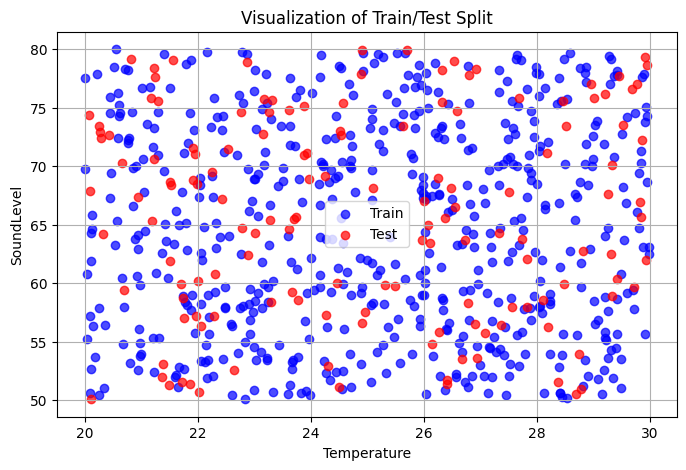

In [4]:
# Visualize data split
plt.figure(figsize=(8, 5))
plt.scatter(X_train['Temperature'], X_train['SoundLevel'], c='blue', label='Train', alpha=0.7)
plt.scatter(X_test['Temperature'], X_test['SoundLevel'], c='red', label='Test', alpha=0.7)
plt.title('Visualization of Train/Test Split')
plt.xlabel('Temperature')
plt.ylabel('SoundLevel')
plt.legend()
plt.grid(True)
plt.show()


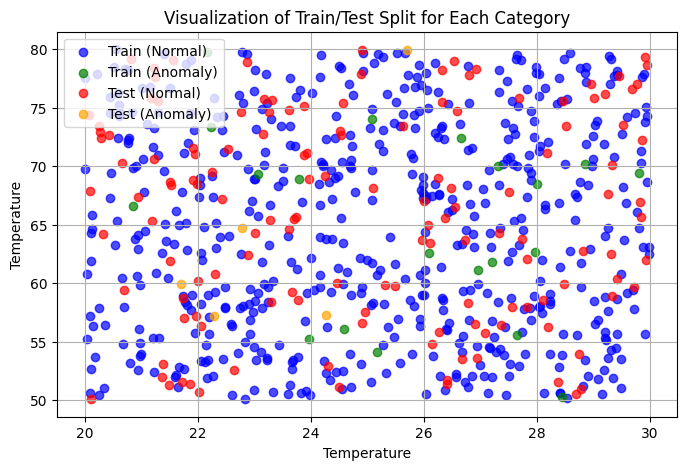

In [7]:
# Visualize data split of each category
plt.figure(figsize=(8, 5))
plt.scatter(X_train.loc[y_train == 0, 'Temperature'], X_train.loc[y_train == 0, 'SoundLevel'], c='blue', label='Train (Normal)', alpha=0.7)
plt.scatter(X_train.loc[y_train == 1, 'Temperature'], X_train.loc[y_train == 1, 'SoundLevel'], c='green', label='Train (Anomaly)', alpha=0.7)
plt.scatter(X_test.loc[y_test == 0, 'Temperature'], X_test.loc[y_test == 0, 'SoundLevel'], c='red', label='Test (Normal)', alpha=0.7)
plt.scatter(X_test.loc[y_test == 1, 'Temperature'], X_test.loc[y_test == 1, 'SoundLevel'], c='orange', label='Test (Anomaly)', alpha=0.7)
plt.title('Visualization of Train/Test Split for Each Category')
plt.xlabel('Temperature')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

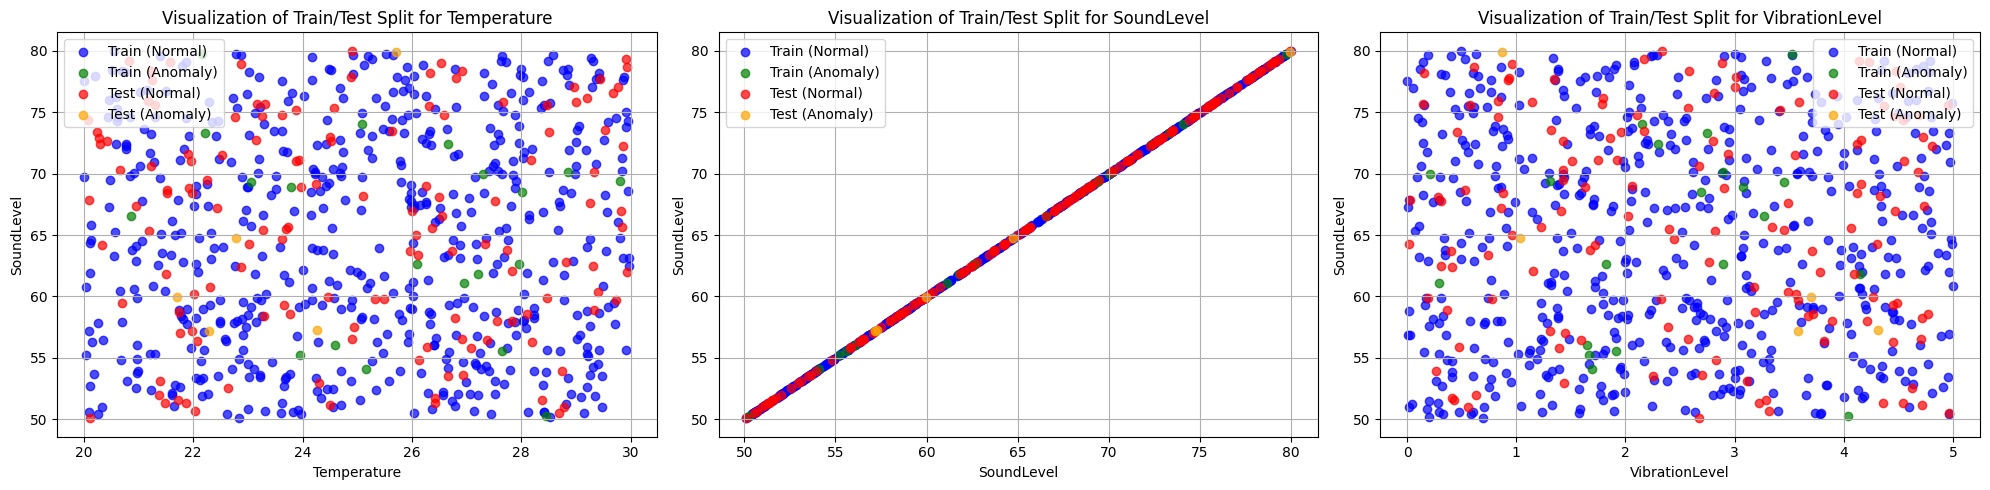

In [8]:
# Visualize data split of each category for each feature
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, feature in enumerate(features):
    axes[i].scatter(X_train.loc[y_train == 0, feature], X_train.loc[y_train == 0, 'SoundLevel'], c='blue', label='Train (Normal)', alpha=0.7)
    axes[i].scatter(X_train.loc[y_train == 1, feature], X_train.loc[y_train == 1, 'SoundLevel'], c='green', label='Train (Anomaly)', alpha=0.7)
    axes[i].scatter(X_test.loc[y_test == 0, feature], X_test.loc[y_test == 0, 'SoundLevel'], c='red', label='Test (Normal)', alpha=0.7)
    axes[i].scatter(X_test.loc[y_test == 1, feature], X_test.loc[y_test == 1, 'SoundLevel'], c='orange', label='Test (Anomaly)', alpha=0.7)
    axes[i].set_title(f'Visualization of Train/Test Split for {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('SoundLevel')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()
